In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 加载数据文件（此处数据已经全部归一化）
df = pd.read_csv("Data1.csv")

In [3]:
# 数据大小
df.shape

(16000, 80)

In [4]:
# 查看数据的信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16000 non-null  int64  
 1   RES                 16000 non-null  int64  
 2   BZ_城乡优抚_            16000 non-null  float64
 3   一天去两家医院的天数_         16000 non-null  float64
 4   就诊的月数_              16000 non-null  float64
 5   月就诊天数_MAX_          16000 non-null  float64
 6   月就诊天数_AVG_          16000 non-null  float64
 7   月就诊医院数_MAX_         16000 non-null  float64
 8   月就诊医院数_AVG_         16000 non-null  float64
 9   就诊次数_SUM_           16000 non-null  float64
 10  月就诊次数_MAX_          16000 non-null  float64
 11  月就诊次数_AVG_          16000 non-null  float64
 12  月统筹金额_MAX_          16000 non-null  float64
 13  月统筹金额_AVG_          16000 non-null  float64
 14  月药品金额_MAX_          16000 non-null  float64
 15  月药品金额_AVG_          16000 non-null  float64
 16  医院_就

In [5]:
# 查看数据的描述
df.describe()

,Unnamed: 0,RES,BZ_城乡优抚_,一天去两家医院的天数_,就诊的月数_,月就诊天数_MAX_,月就诊天数_AVG_,月就诊医院数_MAX_,月就诊医院数_AVG_,就诊次数_SUM_,...,药品在总金额中的占比_,个人支付的药品占比_,检查总费用在总金额占比_,个人支付检查费用占比_,治疗费用在总金额占比_,个人支付治疗费用占比_,BZ_民政救助_,检查费申报金额_SUM_,基本个人账户支付_SUM_,是否挂号_
count,16000.000000,16000.000000,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,...,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04
mean,7999.500000,0.049563,-3.016250e-10,-2.998750e-10,3.634375e-10,4.087499e-11,-4.374996e-12,1.391250e-10,2.737499e-11,1.318750e-11,...,-6.250040e-13,-3.627500e-11,-7.451250e-11,3.523125e-10,6.874963e-13,2.676250e-10,-4.087500e-10,-5.228124e-11,9.425000e-11,2.100003e-11
std,4618.946489,0.217046,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,...,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,0.000000,0.000000,-2.372376e-02,-3.603984e-01,-6.862520e+00,-1.627539e+00,-1.437540e+00,-1.160497e+00,-1.015846e+00,-1.514150e+00,...,-5.062641e+00,-3.931717e-01,-6.050740e-01,-1.696949e-01,-5.224324e-01,-1.864419e-01,-4.086947e-01,-6.783184e-01,-6.193751e-01,-5.823541e-01
25%,3999.750000,0.000000,-2.372376e-02,-3.603984e-01,2.595089e-01,-6.735912e-01,-6.972746e-01,-1.160497e+00,-1.015846e+00,-6.264188e-01,...,-5.518688e-02,-3.929887e-01,-5.869319e-01,-1.696949e-01,-4.206731e-01,-1.864419e-01,-4.086947e-01,-6.572855e-01,-6.193751e-01,-5.823541e-01
50%,7999.500000,0.000000,-2.372376e-02,-3.603984e-01,2.595089e-01,-1.966175e-01,-2.037644e-01,-1.045398e-01,-9.563793e-02,-2.036895e-01,...,3.141506e-01,-3.525068e-01,-3.461709e-01,-1.696949e-01,-3.430217e-01,-1.864419e-01,-4.086947e-01,-3.616574e-01,-1.083557e-01,-5.823541e-01
75%,11999.250000,0.000000,-2.372376e-02,-3.603984e-01,2.595089e-01,5.188430e-01,4.377988e-01,9.514176e-01,3.644659e-01,3.881316e-01,...,5.418470e-01,-4.876392e-02,1.593998e-01,-1.696949e-01,-1.893318e-01,-1.864419e-01,-4.086947e-01,2.225879e-01,1.879818e-01,1.717168e+00
max,15999.000000,1.000000,4.215184e+01,2.030075e+01,1.683915e+00,5.527067e+00,7.149537e+00,6.231204e+00,7.266024e+00,1.142137e+01,...,8.602197e-01,4.888470e+01,1.432413e+01,3.035152e+01,5.902318e+00,1.534220e+01,2.446814e+00,1.180747e+01,3.992539e+01,1.717168e+00


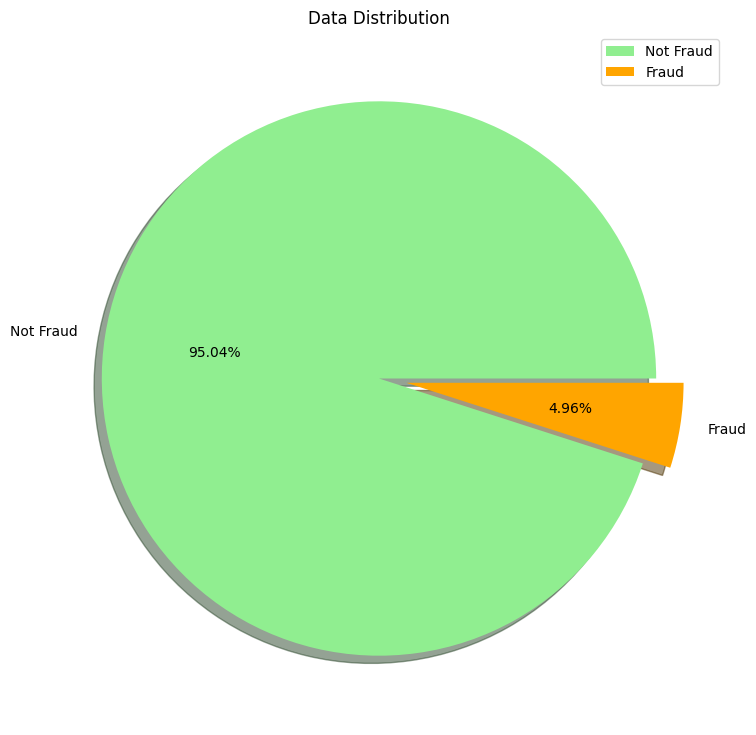

In [7]:
# 查看RES分布 即所占比例
labels = ['Not Fraud', 'Fraud'] # 标签
size = df['RES'].value_counts() # 统计class的类别数量
colors = ['lightgreen', 'orange'] # 颜色
explode = [0, 0.1] # 饼图突出
plt.figure(figsize=(9,9)) # 画布大小
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%') # 饼图参数设置
plt.axis('off') # 关闭坐标轴
plt.title("Data Distribution") # 标题
plt.legend() # 显示标签
plt.show() # 显示

In [15]:
#under_sample 
#下三样取样用于正常值与异常值极度不平衡时，增强异常特征

normal_data_indices = df[df['RES']==0].index # 正常交易数据的索引

In [16]:
# 正常交易数据的数量
len(normal_data_indices)

15207

In [17]:
fraud_data_number = len(df[df['RES']==1]) # 欺诈交易数据的数量

fraud_data_number

793

In [18]:
fraud__data_indices = df[df['RES']==1].index # 欺诈交易数据的索引

In [19]:
# 从正常交易数据中随机选择793个，与欺诈交易数据组成一个新的数据集，使得两者的数量均衡

random_normal_data_indices = np.random.choice(normal_data_indices, fraud_data_number, replace=False) # replace=False,表示不放回随机抽样

In [21]:
# 此时正常值取样与异常值等量

len(random_normal_data_indices)

793

In [22]:
# 合并 随机抽取的正常交易数据的索引 和 欺诈交易数据的索引
under_sample_indices = np.concatenate([fraud__data_indices, random_normal_data_indices])

In [23]:
# under sample dataset 下采样的数据集
under_sample_dataset = df.iloc[under_sample_indices, :]

In [24]:
# 区分 数据集 和 标签集
X_under_sample = under_sample_dataset.drop('RES', axis=1) # 数据集
y_under_sample = under_sample_dataset['RES'] # 标签集

In [26]:
print("欺诈交易的占比：", under_sample_dataset[under_sample_dataset['RES']==1].shape[0] / under_sample_dataset.shape[0] * 100,"%")

欺诈交易的占比： 50.0 %


In [27]:
# 数据集分割：训练集和测试集
from sklearn.model_selection import train_test_split

X = df.drop('RES', axis=1) # 数据集
y = df['RES'] # 标签

#kFold = StratifiedKFold(n_splits=5, random_state=666, shuffle=True) # 5折交叉验证

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [28]:
# 数据集
X_train = X_train.values
X_test = X_test.values
# 标签
y_train = y_train.values
y_test = y_test.values

In [30]:
# 新数据也划分为数据集，标签集

X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_under_sample, y_under_sample, test_size=0.2, random_state=666)

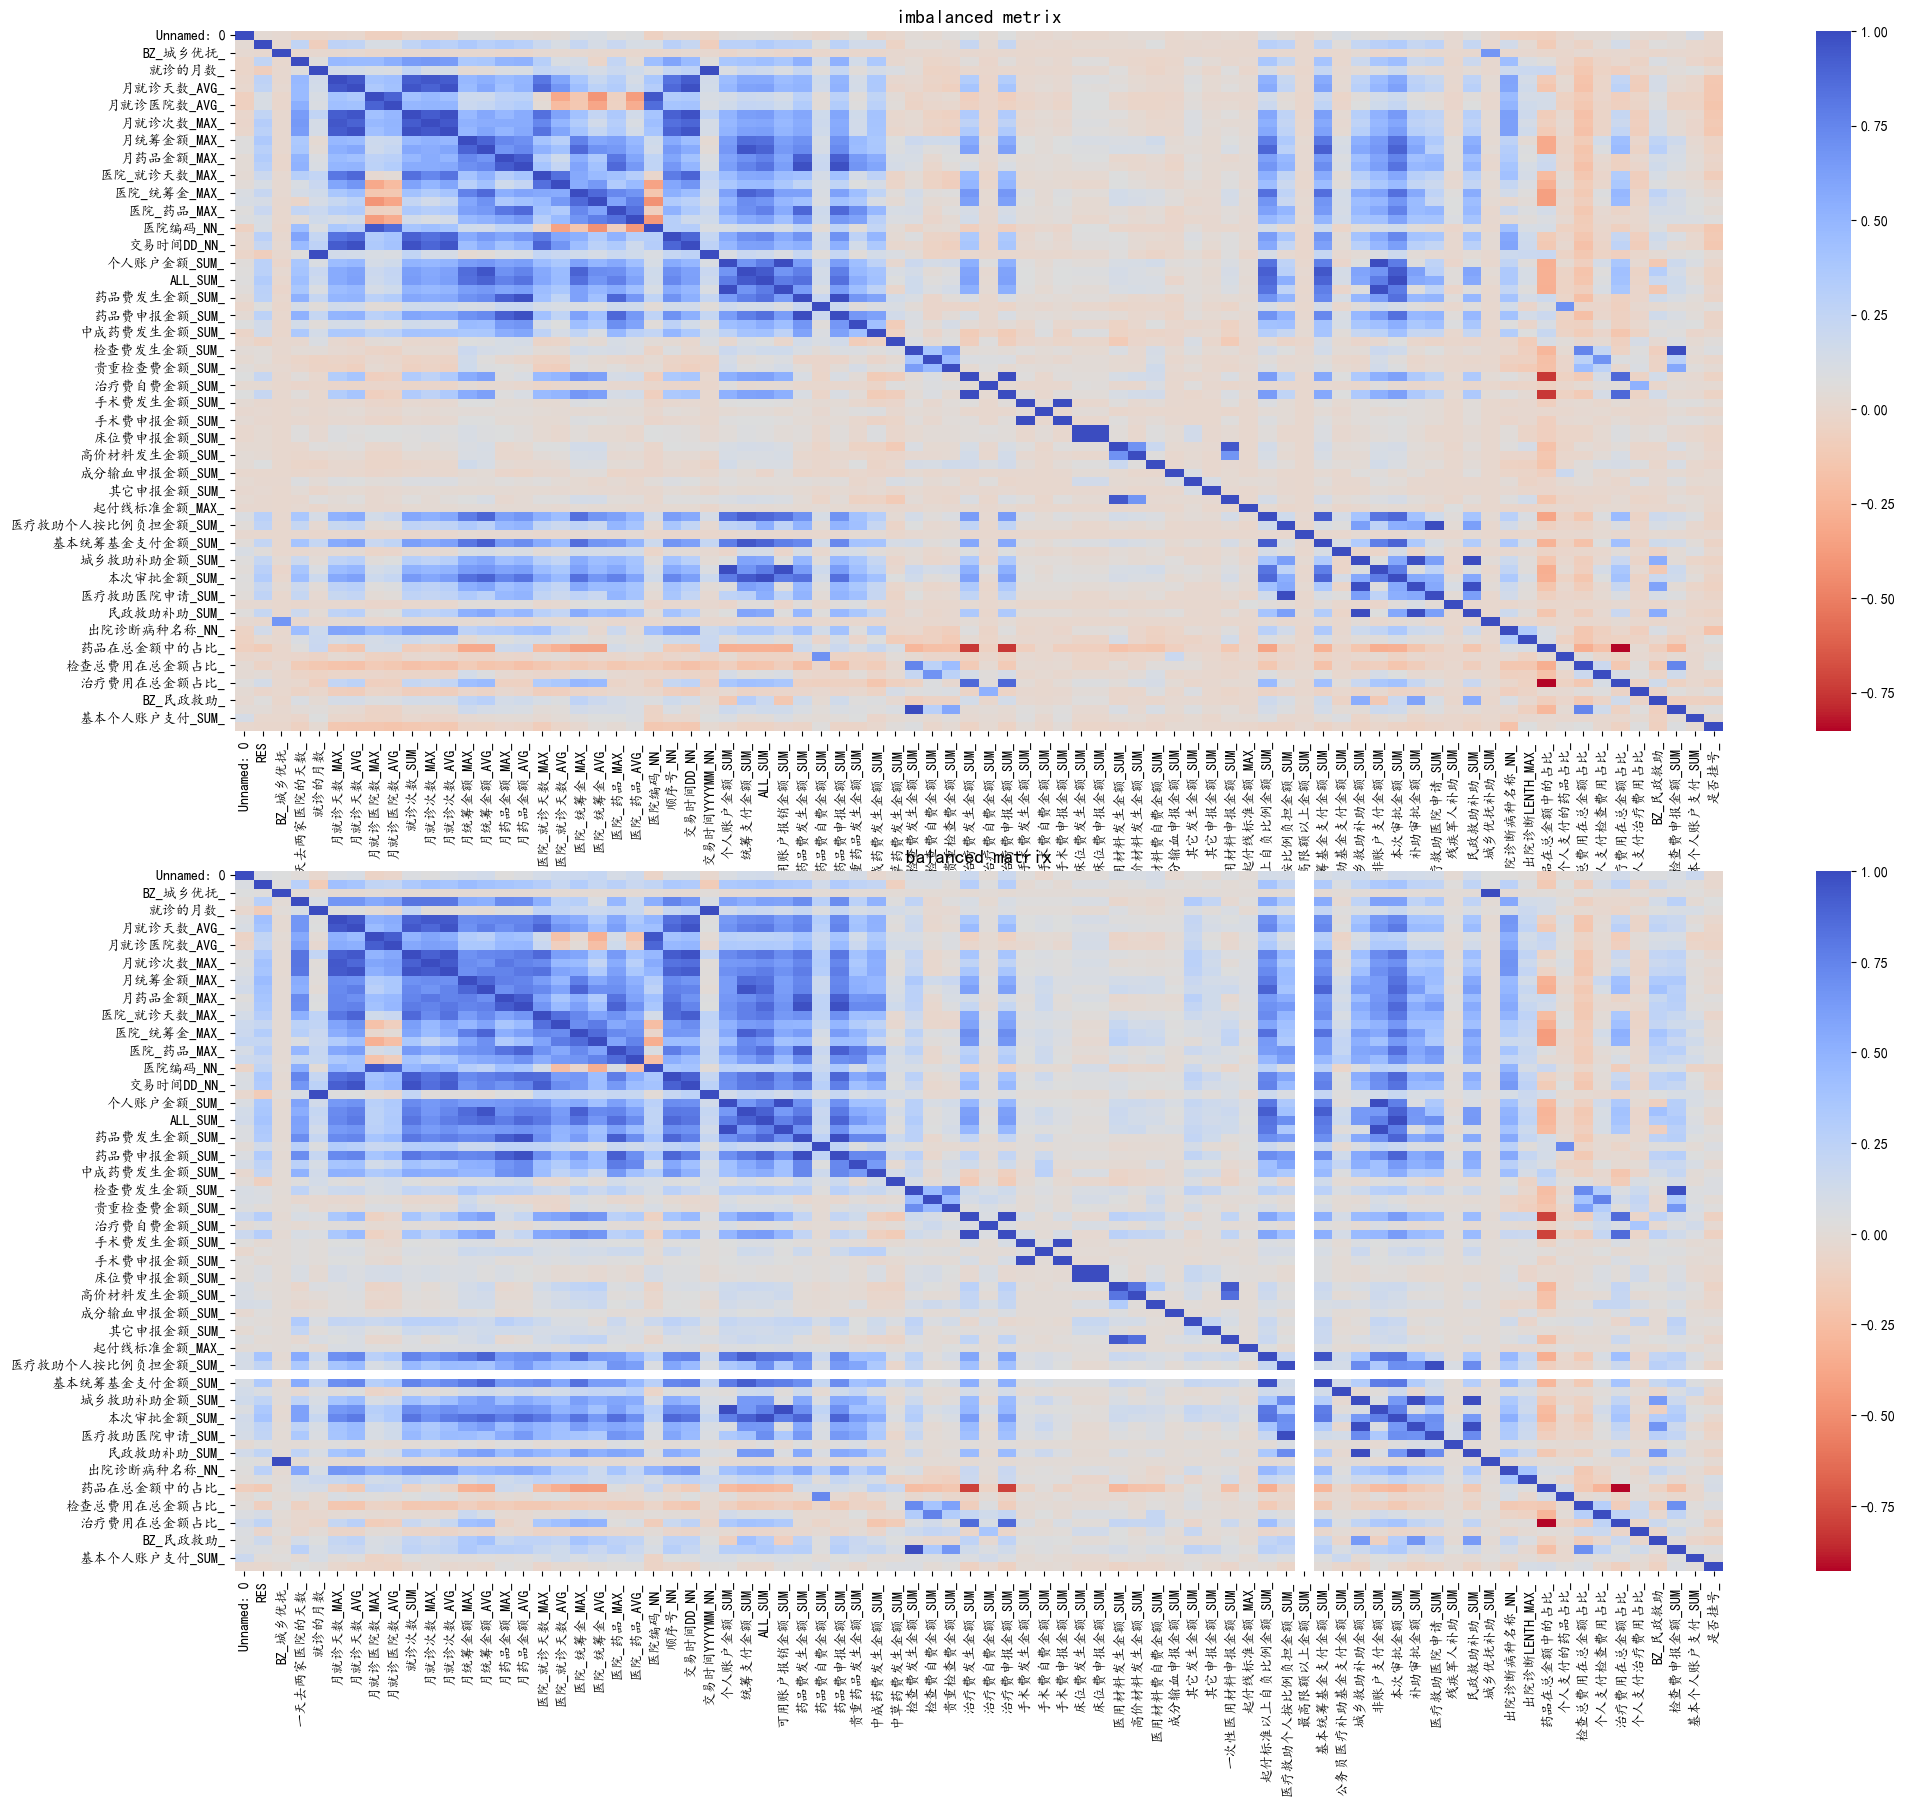

In [31]:
# 展示特征因子之间的热力图

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20)) # 画布大小
plt.rcParams['font.sans-serif']=['Kaiti'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 整个DataFrame
corr = df.corr() # 相关系数
sns.heatmap(corr,cmap='coolwarm_r', annot_kws={'size':20},ax=ax1)
ax1.set_title("imbalanced metrix", fontsize=14)

# 新的DataFrame
df_corr = under_sample_dataset.corr() 
sns.heatmap(df_corr, cmap='coolwarm_r',annot_kws={'size':20}, ax=ax2)
ax2.set_title("balanced matrix", fontsize=14)

plt.show()

In [32]:
# 简单分类器实现
from sklearn.linear_model import LogisticRegression # 逻辑回归
from sklearn.linear_model import SGDClassifier      # 随机梯度
from sklearn.neighbors import KNeighborsClassifier  # K近邻
from sklearn.svm import SVC                         # 支撑向量机
from sklearn.tree import DecisionTreeClassifier     # 决策树
from sklearn.ensemble import RandomForestClassifier # 随机森林
from sklearn.model_selection import cross_val_score # 交叉验证计算accuracy
from sklearn.model_selection import GridSearchCV    # 网格搜索，获取最优参数
from sklearn.model_selection import StratifiedKFold # 交叉验证
from collections import Counter
# 评估指标
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier # 集成学习
from xgboost import XGBClassifier                   # 极限梯度提升树

classifiers = {
    'LogisticRegression':LogisticRegression(), # 逻辑回归
    "SVC":SVC(),                               # 支撑向量机
    "KNN":KNeighborsClassifier(),              # K近邻
    'DT':DecisionTreeClassifier(),             # 决策树
    'RFC':RandomForestClassifier(),            # 随机森林
    'Bagging':BaggingClassifier(),             # 集成学习bagging
    'SGD':SGDClassifier(),                     # 随机梯度
    'GBC':GradientBoostingClassifier(),        # 集成学习Gradient
    'xgb':XGBClassifier()                      # 极限梯度提升树
}

In [33]:
def accuracy_score(X_train, y_train):
    for key, classifier in classifiers.items(): # 遍历每一个分类器，分别训练、计算得分
        classifier.fit(X_train, y_train)
        training_score = cross_val_score(classifier, X_train, y_train, cv=5) # 5折交叉验证
        print("Classifier Name : ", classifier.__class__.__name__,"  Training Score ：", round(training_score.mean(), 2)*100,'%')

In [34]:
# 1.1 使用原始数据集
accuracy_score(X_train, y_train)

Classifier Name :  LogisticRegression   Training Score ： 96.0 %
Classifier Name :  SVC   Training Score ： 95.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 95.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 94.0 %
Classifier Name :  RandomForestClassifier   Training Score ： 96.0 %
Classifier Name :  BaggingClassifier   Training Score ： 96.0 %
Classifier Name :  SGDClassifier   Training Score ： 93.0 %
Classifier Name :  GradientBoostingClassifier   Training Score ： 96.0 %
Classifier Name :  XGBClassifier   Training Score ： 96.0 %


In [35]:
# 1.2 使用新的数据集
accuracy_score(X_new_train, y_new_train)

Classifier Name :  LogisticRegression   Training Score ： 74.0 %
Classifier Name :  SVC   Training Score ： 54.0 %
Classifier Name :  KNeighborsClassifier   Training Score ： 52.0 %
Classifier Name :  DecisionTreeClassifier   Training Score ： 78.0 %
Classifier Name :  RandomForestClassifier   Training Score ： 83.0 %
Classifier Name :  BaggingClassifier   Training Score ： 81.0 %
Classifier Name :  SGDClassifier   Training Score ： 50.0 %
Classifier Name :  GradientBoostingClassifier   Training Score ： 83.0 %
Classifier Name :  XGBClassifier   Training Score ： 83.0 %


In [36]:
# 由此可以得到该数据集不适合用下三样采样
# 逻辑回归、随机森林、决策树、集成学习bagging、集成学习Gradient、极限梯度提升树方法较优

In [37]:
# 2.利用网格搜索：获取最优超参数

# 1 LR
def LR_gs(X_train, y_train):
    # LR
    LR_param = {
        'penalty':['l1', 'l2'],
        'C':[0.001, 0.01, 0.1, 1, 10]
    }

    LR_gs = GridSearchCV(LogisticRegression(),param_grid=LR_param, n_jobs=-1, scoring='accuracy')
    LR_gs.fit(X_train, y_train)

    LR_estimators = LR_gs.best_estimator_ # 最优参数
    
    return LR_estimators

In [38]:
# 2 KNN
def KNN_gs(X_train, y_train):
    KNN_param = {
        'n_neighbors':list(range(2, 5, 1)),
        'algorithm':['auto','ball_tree','kd_tree','brute']
    }

    KNN_gs = GridSearchCV(KNeighborsClassifier(), param_grid=KNN_param, n_jobs=-1, scoring='accuracy')
    KNN_gs.fit(X_train, y_train)

    KNN_estimators = KNN_gs.best_estimator_ # 最优参数
    
    return KNN_estimators

In [39]:
# 3 SVC
def SVC_gs(X_train, y_train):
    SVC_param = {
        'C':[0.5, 0.7, 0.9, 1],
        'kernel':['rfb', 'poly', 'sigmod', 'linear']
    }

    SVC_gs = GridSearchCV(SVC(), param_grid=SVC_param, n_jobs=-1, scoring='accuracy')
    SVC_gs.fit(X_train, y_train)

    SVC_estimators = SVC_gs.best_estimator_ # 最优参数
    
    return SVC_estimators

In [40]:
# 4 DT
def DT_gs(X_train, y_train):
    DT_param = {
        'criterion':['gini', 'entropy'], # 衡量标准
        'max_depth':list(range(2, 5, 1)), # 树的深度
        'min_samples_leaf':list(range(3, 7, 1)) # 最小叶子节点数
    }

    DT_gs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, n_jobs=-1, scoring='accuracy')
    DT_gs.fit(X_train, y_train)

    DT_estimators = DT_gs.best_estimator_ # 最优参数
    
    return DT_estimators

In [41]:
# 5 RFC
def RFC_gs(X_train, y_train):
    RFC_param = {
        'n_estimators':[100, 150, 200], # 多少棵树
        'criterion':['gini', 'entropy'], # 衡量标准
        'max_depth':list(range(2,5,1)), # 树的深度
    }
    
    RFC_gs = GridSearchCV(RandomForestClassifier(), param_grid=RFC_param, n_jobs=-1, scoring='accuracy')
    RFC_gs.fit(X_train, y_train)
    
    RFC_estimators = RFC_gs.best_estimator_
    
    return RFC_estimators

In [42]:
# 6 Bag
def BAG_gs(X_train, y_train):
    BAG_param = {
        'n_estimators':[10, 15, 20]
    }
    
    BAG_gs = GridSearchCV(BaggingClassifier(), param_grid=BAG_param, n_jobs=-1, scoring='accuracy')
    BAG_gs.fit(X_train, y_train)
    
    BAG_estimators = BAG_gs.best_estimator_
    
    return BAG_estimators

In [43]:
# 7 SGD
def SGD_gs(X_train, y_train):
    SGD_param = {
        'penalty':['l2','l1'],
        'max_iter':[1000, 1500, 2000]
    }
    
    SGD_gs = GridSearchCV(SGDClassifier(), param_grid=SGD_param, n_jobs=-1, scoring='accuracy')
    SGD_gs.fit(X_train, y_train)
    
    SGD_estimators = SGD_gs.best_estimator_
    
    return SGD_estimators

In [44]:
# 8 xgb
def XGB_gs(X_train, y_train):
    XGB_param = {
        'max_depth':[3,4,5,6]
    }
    
    XGB_gs = GridSearchCV(XGBClassifier(), param_grid=XGB_param, n_jobs=-1, scoring='accuracy')
    XGB_gs.fit(X_train, y_train)
    
    XGB_estimators = XGB_gs.best_estimator_
    
    return XGB_estimators

In [ ]:
# 采用新的数据集：X_new_train, y_new_train

# 模型交叉验证、训练，获取最优超参数

LR_best_estimator = LR_gs(X_new_train, y_new_train)
KNN_best_estimator = KNN_gs(X_new_train, y_new_train)
SVC_best_estimator = SVC_gs(X_new_train, y_new_train)
DT_best_estimator = DT_gs(X_new_train, y_new_train)
RFC_best_estimator = RFC_gs(X_new_train, y_new_train)
BAG_best_estimator = BAG_gs(X_new_train, y_new_train)
SGD_best_estimator = SGD_gs(X_new_train, y_new_train)
XGB_best_estimator = XGB_gs(X_new_train, y_new_train)

In [ ]:
# 预测新的数据集：X_new_test, y_new_test
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

result_df = pd.DataFrame(columns=['Accuracy', 'F1-score', 'Recall', 'Precision', 'AUC_ROC'],
                         index=['LR','KNN','SVC','DT','RFC','BAG','SGD','XGB'])

def caculate(models, X_test, y_test):
    # 计算各种参数的值
    accuracy_results = []
    F1_score_results = []
    Recall_results = []
    Precision_results = []
    AUC_ROC_results = []
    
    for model in models:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred) # 计算准确度
        precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred) # 计算：精确度，召回率，f1_score
        AUC_ROC = roc_auc_score(y_test, y_pred) # 计算AUC
        
        # 保存计算值
        accuracy_results.append(accuracy)
        F1_score_results.append(f1_score)
        Recall_results.append(recall)
        AUC_ROC_results.append(AUC_ROC)
        Precision_results.append(precision)
        
    return accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results

In [ ]:
# 将所有最优超参数的模型放在一起
best_models = [LR_best_estimator,KNN_best_estimator,SVC_best_estimator,DT_best_estimator,RFC_best_estimator,BAG_best_estimator,SGD_best_estimator,XGB_best_estimator]

# 调用函数计算各项指标值
accuracy_results, F1_score_results, Recall_results, AUC_ROC_results, Precision_results = caculate(best_models, X_new_test, y_new_test)

# 将各项值放入到DataFrame中
result_df['Accuracy'] = accuracy_results
result_df['F1-score'] = F1_score_results
result_df['Recall'] = Recall_results
result_df['Precision'] = Precision_results
result_df['AUC_ROC'] = AUC_ROC_results

In [ ]:
result_df # 显示计算结果